**Introduction**


The analysis period spans from 1990 to 2024 on a global scale, but focuses on countries that allow for relevant comparisons, particularly to situate Chile within the Latin American context.

The aim is to contrast opinions with objective data on Chile, especially when it is described as a leading country in the region. Likewise, it examines the demands for greater state funding—based on the argument that Chile has sufficient resources—versus those who claim that resources are limited and advocate for private sector involvement to meet social demands.

In [2]:
#Libraries to use
import pandas as pd
from pandas_datareader import wb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.patches import Patch
import warnings

**Países**

Aquí se detalla el país o los países utilizados en el análisis. Se crearan listas según se va avanzando el analisis y se requiera revisar algun  conjunto de países, etc. 


In [4]:
#Primer grupo. Países que son parte de la OCDE
#Lista de países (actualizada a 2023). 
oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 
    'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
    'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 
    'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']

#Segundo grupo. Países de América Central y del Sur

central_south_america = ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala',
    'Honduras', 'Nicaragua', 'Panama', 'Antigua and Barbuda', 'Bahamas',
    'Barbados', 'Cuba', 'Dominica', 'Grenada', 'Haiti', 'Jamaica',
    'Dominican Republic', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines',
    'Saint Lucia', 'Trinidad and Tobago', 'Argentina', 'Bolivia', 'Brazil', 'Chile',
    'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

In [5]:
type(central_south_america)

list

**Función para obtener los datos del indicador**

In [7]:
def descargar_datos_wb(indicadores, paises, inicio, fin):      
    dfs = []
    for nombre, indicador in indicadores.items():
        try:
            df = wb.download(indicator=indicador, country=paises, start=inicio, end=fin)
            df.reset_index(inplace=True)
            df['indicador'] = nombre 
            df.rename(columns={indicador: 'valor'}, inplace=True)
            dfs.append(df)
        except Exception as e:
            print(f"Error al descargar el indicador {nombre} ({indicador}): {str(e)}")
    
    # Combinar todos los DataFrames
    if dfs:
        df_final = pd.concat(dfs, ignore_index=True)
        return df_final
    else:
        return pd.DataFrame()

In [8]:
# Buscar indicadores relacionados con "gdp"
resultados = wb.search('gfs')

# Convertir a DataFrame
resultados_gfs = pd.DataFrame(resultados)

# Mostrar las primeras filas y también generar un archivo excel por una sola vez
resultados_gfs.to_excel('GFS.xlsx')
resultados_gfs.head(1)

,id,name,unit,source,sourceNote,sourceOrganization,topics
6799,FB.INC.NSTR.GF.FI.DV,012_Is a general financial sector development ...,,Global Financial Inclusion and Consumer Protec...,,b'',


**Comparative GDP, year 2023: American Latin Countries vs. OCDE Countries**



In [10]:
# Crecimiento del PIB
indicadores = {
    'crecimiento del PIB': 'NY.GDP.MKTP.KD.ZG'}

paises = ['CHL']

pib_chile = descargar_datos_wb(indicadores, paises, '1990', '2024')
pib_chile.to_excel('pib_chile.xlsx')
pib_chile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    35 non-null     object 
 1   year       35 non-null     object 
 2   valor      34 non-null     float64
 3   indicador  35 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_6640\4089211945.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises, start=inicio, end=fin)


In [11]:
# Revisar el dato 
pib_chile.describe()

,valor
count,34.000000
mean,4.238193
std,3.477831
min,-6.143475
25%,2.082041
50%,4.452066
75%,6.206758
max,11.333957


In [12]:
# Indicador a explorar:
indicadores = {
    'gasto_militar': 'MS.MIL.XPND.GD.ZS',
    'gasto_corriente_salud': 'SH.XPD.CHEX.GD.ZS',
    'gasto_publico_educacion': 'SE.XPD.TOTL.GD.ZS',
    'gasto_investigacion_desarrollo':'GB.XPD.RSDV.GD.ZS',
}

paises = ['CHL']

df_datos = descargar_datos_wb(indicadores, paises, '1990', '2024')
df_datos.to_excel('Gasto.xlsx')
df_datos.info()

C:\Users\Paula\AppData\Local\Temp\ipykernel_6640\4089211945.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises, start=inicio, end=fin)
C:\Users\Paula\AppData\Local\Temp\ipykernel_6640\4089211945.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises, start=inicio, end=fin)
C:\Users\Paula\AppData\Local\Temp\ipykernel_6640\4089211945.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises, start=inicio, end=fin)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    140 non-null    object 
 1   year       140 non-null    object 
 2   valor      101 non-null    float64
 3   indicador  140 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.5+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_6640\4089211945.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises, start=inicio, end=fin)


In [13]:
# Agrupar por 'indicador' y aplicar describe() a 'valor'
descripcion_por_indicador = df_datos.groupby('indicador')['valor'].describe()

descripcion_por_indicador

,count,mean,std,min,25%,50%,75%,max
indicador,,,,,,,,
gasto_corriente_salud,24.0,7.845917,1.279334,6.072356,6.887610,7.250373,9.105489,10.095326
gasto_investigacion_desarrollo,15.0,0.358137,0.021188,0.311430,0.347655,0.360410,0.372975,0.390300
gasto_militar,34.0,2.336439,0.412634,1.548322,1.973986,2.473761,2.620769,3.401655
gasto_publico_educacion,28.0,3.941245,1.044306,2.250160,3.184907,3.855295,4.789735,5.629930


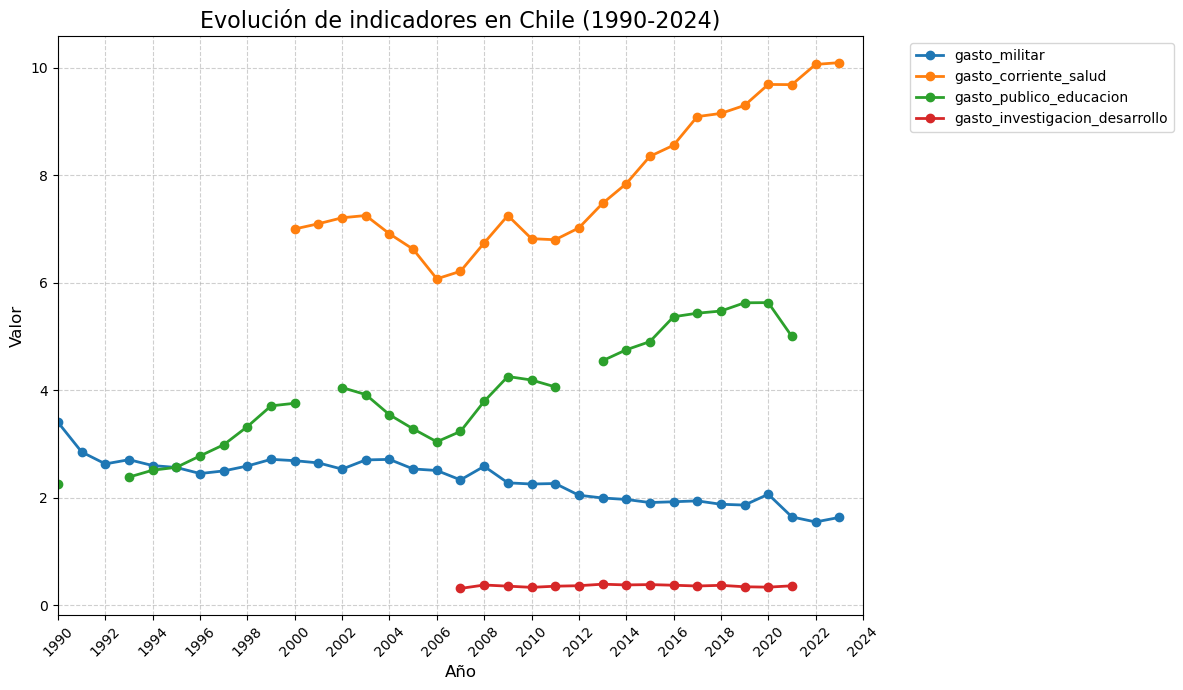

In [14]:
plt.figure(figsize=(12, 7))
df_datos['year'] = df_datos['year'].astype(int)  # Antes de graficar

# Iterar por cada indicador único
for indicador in df_datos['indicador'].unique():
    subset = df_datos[df_datos['indicador'] == indicador]
    plt.plot(subset['year'], subset['valor'], 
             label=indicador, 
             marker='o', 
             linewidth=2)

# Configuración del eje X (años)
years = df_datos['year'].unique()  # Obtener todos los años únicos
pares = [year for year in years if year % 2 == 0]  # Filtrar solo pares
plt.xticks(pares)  # Establecer ticks solo para años pares

# Asegurar orden cronológico (de menor a mayor)
plt.xlim(min(years), max(years))  # Límites del eje X

plt.title('Evolución de indicadores en Chile (1990-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()